In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style("whitegrid")

In [2]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [3]:
crypto = yf.download(['BTC-USD', 'ETH-USD', 'DOGE-USD', 'DAI-USD'], start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [4]:
crypto

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
Date,,,,
2023-12-23 00:00:00+00:00,43739.542969,0.999975,0.093562,2309.046387
2023-12-24 00:00:00+00:00,43016.117188,0.999509,0.091895,2265.692139
2023-12-25 00:00:00+00:00,43613.140625,0.999616,0.094449,2272.561768
2023-12-26 00:00:00+00:00,42520.402344,1.000384,0.091356,2231.465332
2023-12-27 00:00:00+00:00,43442.855469,1.000313,0.093579,2378.739990
...,...,...,...,...
2024-12-18 00:00:00+00:00,100041.539062,0.999787,0.358039,3618.791260
2024-12-19 00:00:00+00:00,97490.953125,0.999924,0.315066,3417.927979
2024-12-20 00:00:00+00:00,97755.929688,1.000035,0.317713,3472.553467


In [5]:
crypto.describe()

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
count,366.000000,366.000000,366.000000,366.000000
mean,64675.284548,0.999957,0.157345,3018.134446
std,14348.059640,0.000161,0.092648,519.615434
min,39507.367188,0.999413,0.077933,2210.761963
25%,58207.883789,0.999855,0.102594,2524.800659
50%,63831.296875,0.999956,0.128701,3059.113647
75%,68506.353516,1.000058,0.161689,3465.620056
max,106140.601562,1.000560,0.467297,4066.445068


Text(0.5, 1.0, 'Bitcoin')

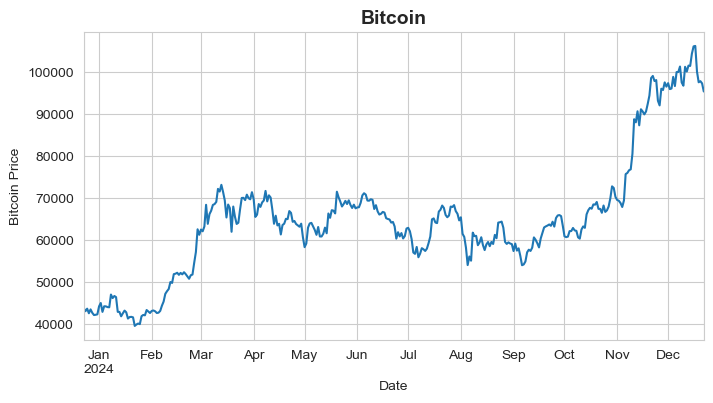

In [6]:
crypto['BTC-USD'].plot(figsize=(8, 4))
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Ethereum')

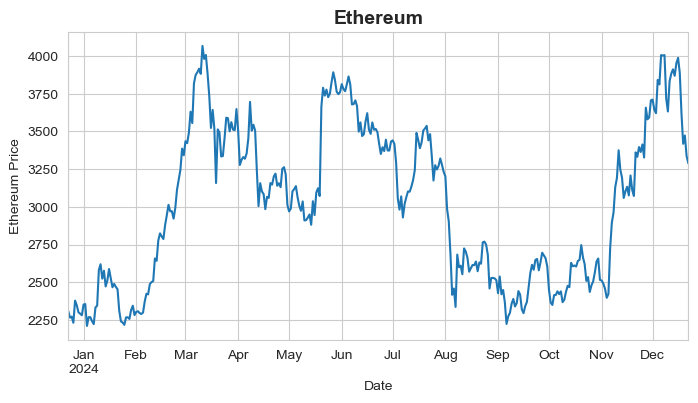

In [7]:
crypto['ETH-USD'].plot(figsize=(8, 4))
plt.ylabel('Ethereum Price')
plt.title('Ethereum', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Doge Coin')

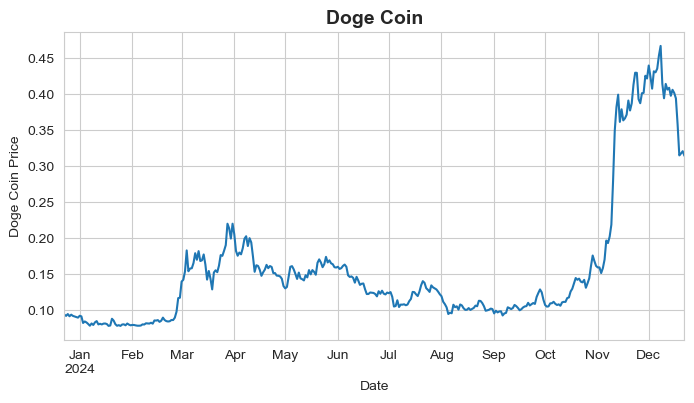

In [8]:
crypto['DOGE-USD'].plot(figsize=(8, 4))
plt.ylabel('Doge Coin Price')
plt.title('Doge Coin', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'DAI')

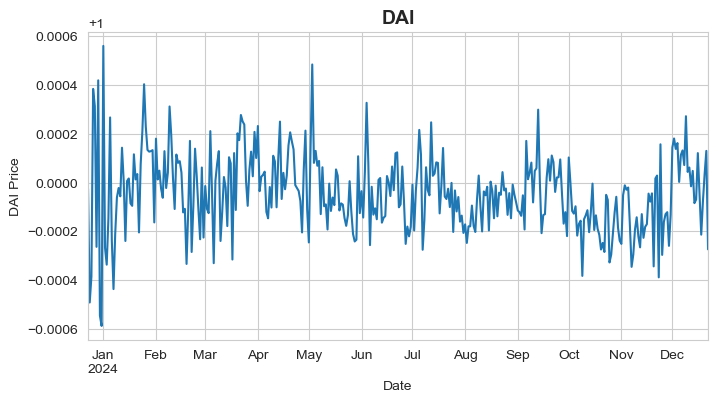

In [9]:
crypto['DAI-USD'].plot(figsize=(8, 4))
plt.ylabel('DAI Price')
plt.title('DAI', fontsize=14, fontweight='bold')

In [10]:
crypto.corr()

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
Ticker,,,,
BTC-USD,1.000000,-0.051736,0.922149,0.657949
DAI-USD,-0.051736,1.000000,0.002695,0.080190
DOGE-USD,0.922149,0.002695,1.000000,0.573661
ETH-USD,0.657949,0.080190,0.573661,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

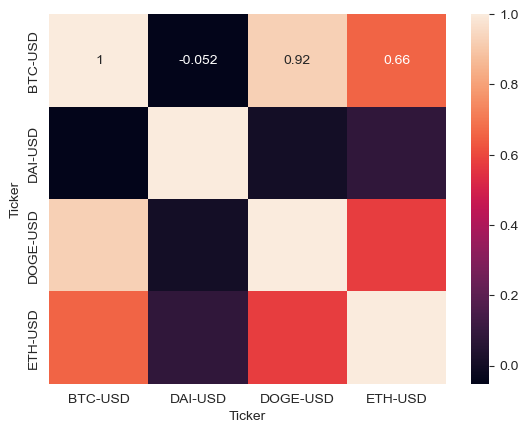

In [11]:
sns.heatmap(data=crypto.corr(), annot=True)

In [12]:
def GBM(sp, time, mean, std):
    dt = 1/time
    price = np.zeros(time)
    price[0] = sp
    
    shock = np.zeros(time)
    drift = np.zeros(time)
    
    for x in range(1, time):
        shock[x] = np.random.normal(loc=mean*dt, scale=std*np.sqrt(dt))
        drift[x] = mean*dt
        price[x] = price[x-1] + price[x-1]*(shock[x]+drift[x])
    return price

In [13]:
rets = crypto.pct_change()

In [14]:
rets

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
Date,,,,
2023-12-23 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-12-24 00:00:00+00:00,-0.016539,-0.000466,-0.017817,-0.018776
2023-12-25 00:00:00+00:00,0.013879,0.000107,0.027793,0.003032
2023-12-26 00:00:00+00:00,-0.025055,0.000768,-0.032748,-0.018084
2023-12-27 00:00:00+00:00,0.021694,-0.000071,0.024333,0.065999
...,...,...,...,...
2024-12-18 00:00:00+00:00,-0.057462,-0.000168,-0.092048,-0.068945
2024-12-19 00:00:00+00:00,-0.025495,0.000137,-0.120023,-0.055506
2024-12-20 00:00:00+00:00,0.002718,0.000111,0.008401,0.015982


In [15]:
rets.describe()

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
count,365.000000,3.650000e+02,365.000000,365.000000
mean,0.002522,-6.607562e-07,0.004724,0.001542
std,0.027976,1.968825e-04,0.053759,0.034135
min,-0.083434,-9.636417e-04,-0.158400,-0.102436
25%,-0.012312,-1.039994e-04,-0.025138,-0.016530
50%,0.001321,2.026301e-06,-0.000302,0.000752
75%,0.015545,1.070571e-04,0.029545,0.017927
max,0.121443,1.147705e-03,0.275799,0.192722


<Axes: xlabel='Ticker', ylabel='Ticker'>

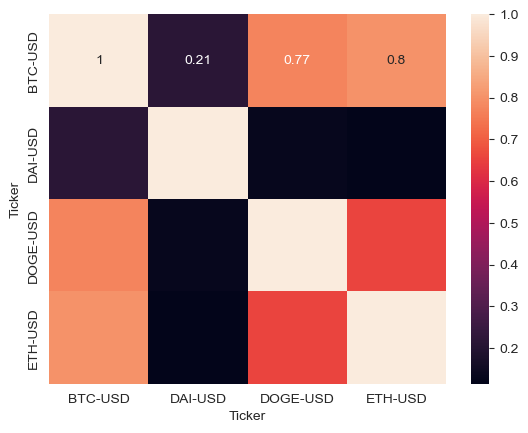

In [16]:
sns.heatmap(data=rets.corr(), annot=True)

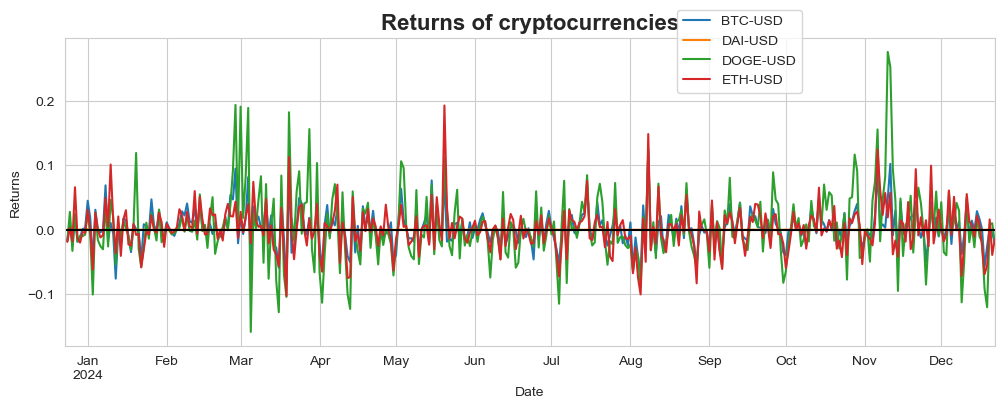

In [17]:
rets.plot(figsize=(12, 4))
plt.ylabel('Returns')
plt.title('Returns of cryptocurrencies', fontsize=16, fontweight='bold')
plt.axhline(color='k')
plt.legend(bbox_to_anchor=(0.8, 0.8))

In [18]:
rets.columns

Index(['BTC-USD', 'DAI-USD', 'DOGE-USD', 'ETH-USD'], dtype='object', name='Ticker')

In [19]:
runs = 1000
simulation = np.zeros(runs)
for run in range(runs):
    simulation[run] = GBM(rets['BTC-USD'].dropna().iat[1], 365, rets['BTC-USD'].mean(), rets['BTC-USD'].std())[364]

In [20]:
simulation

array([0.01407821, 0.01422977, 0.01384057, 0.01433283, 0.01433892,
       0.01381903, 0.013693  , 0.01365559, 0.01393955, 0.01428317,
       0.01368704, 0.0138503 , 0.0138066 , 0.01375206, 0.01398482,
       0.01379625, 0.01456469, 0.01430573, 0.01337475, 0.01420784,
       0.01435164, 0.01403699, 0.01398384, 0.01344283, 0.01387733,
       0.01407558, 0.01395522, 0.01393404, 0.01430882, 0.01405441,
       0.01410913, 0.01345946, 0.01332321, 0.01390531, 0.0135882 ,
       0.01363026, 0.01427144, 0.01375945, 0.01333755, 0.01397828,
       0.01350094, 0.01373125, 0.01402996, 0.01366245, 0.01375079,
       0.01403811, 0.01408085, 0.01375933, 0.01383615, 0.01385266,
       0.01307198, 0.01428621, 0.01418467, 0.01423161, 0.0145304 ,
       0.01413583, 0.01435241, 0.01390719, 0.0140057 , 0.01418771,
       0.01449695, 0.01387932, 0.01402054, 0.01432896, 0.01378003,
       0.0149322 , 0.01379921, 0.01357724, 0.01507801, 0.01427477,
       0.0143473 , 0.01477699, 0.01413342, 0.01366277, 0.01371

(array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,  3.,  1.,
         3.,  5.,  0.,  0.,  3.,  6.,  3.,  5.,  4.,  9.,  6.,  7., 12.,
        12., 13., 11., 16., 12.,  9., 25., 19., 19., 22., 14., 22., 21.,
        24., 23., 31., 13., 29., 26., 25., 22., 28., 25., 28., 23., 23.,
        25., 18., 17., 12., 21., 25., 20., 22., 17., 19., 10., 15., 23.,
        13., 17.,  9., 16.,  9., 10.,  7.,  6.,  6.,  6.,  3.,  7.,  6.,
         2.,  3.,  3.,  4.,  2.,  1.,  3.,  2.,  2.,  1.,  1.,  2.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([0.01279354, 0.01281779, 0.01284203, 0.01286627, 0.01289052,
        0.01291476, 0.01293901, 0.01296325, 0.0129875 , 0.01301174,
        0.01303599, 0.01306023, 0.01308447, 0.01310872, 0.01313296,
        0.01315721, 0.01318145, 0.0132057 , 0.01322994, 0.01325419,
        0.01327843, 0.01330268, 0.01332692, 0.01335116, 0.01337541,
        0.01339965, 0.0134239 , 0.01344814, 0.01347239, 0.01349663,
        0.01352088, 0.0135

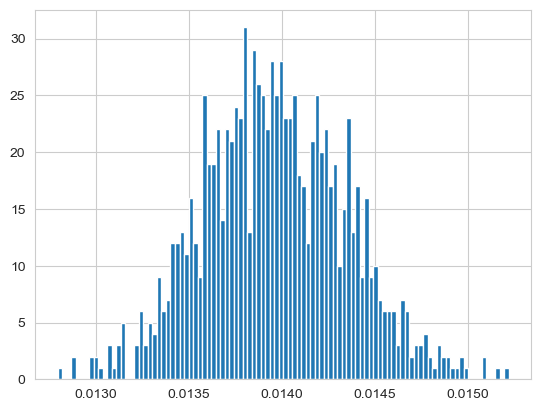

In [21]:
plt.hist(simulation, bins=100)

In [22]:
runs = 100
data = pd.DataFrame(columns=rets.columns)
for com in rets.columns:
    i = 0
    simulation = np.zeros(runs)
    for run in range(runs):
        simulation[run] = GBM(crypto[com].dropna().iat[1], 365, rets[com].mean(), rets[com].std())[364]
    data[com]=simulation
    i += 1

In [23]:
data

Ticker,BTC-USD,DAI-USD,DOGE-USD,ETH-USD
0,43560.786069,0.999673,0.089101,2153.024666
1,43430.227901,0.999350,0.103590,2297.058880
2,44459.492677,0.999435,0.096903,2306.147145
3,42163.726376,0.999474,0.093636,2499.396676
4,46138.834171,0.999608,0.093041,2348.836577
...,...,...,...,...
95,42824.719366,0.999410,0.093399,2431.880955
96,45388.225484,0.999544,0.086310,2206.732077
97,43261.151846,0.999425,0.087546,2389.812041
98,41988.574860,0.999429,0.094733,2355.053253


In [24]:
coins = np.array(['BTC-USD', 'ETH-USD', 'DOGE-USD', 'DAI-USD'])

<Figure size 640x480 with 0 Axes>

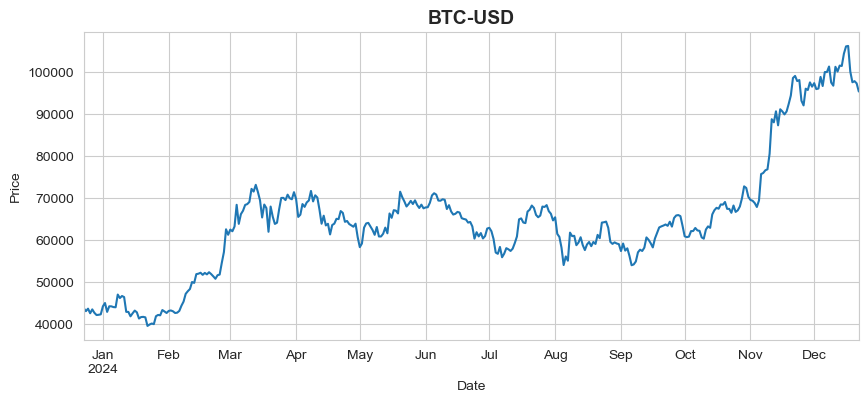

<Figure size 640x480 with 0 Axes>

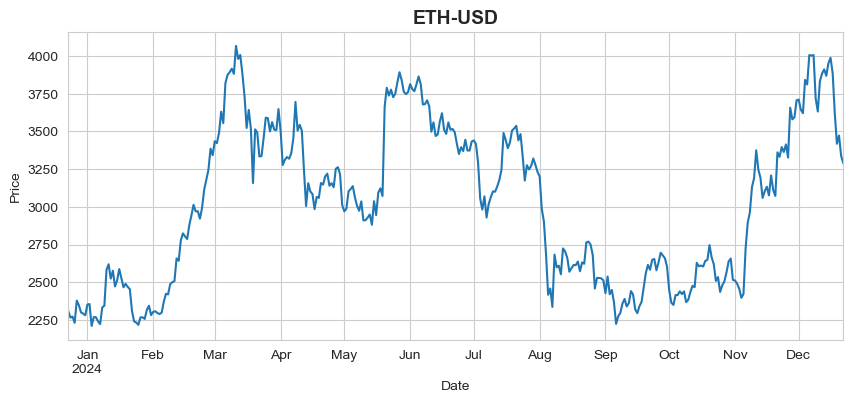

<Figure size 640x480 with 0 Axes>

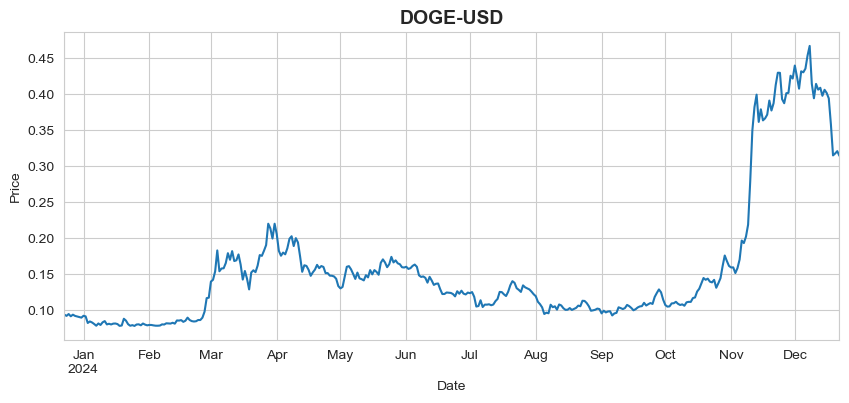

<Figure size 640x480 with 0 Axes>

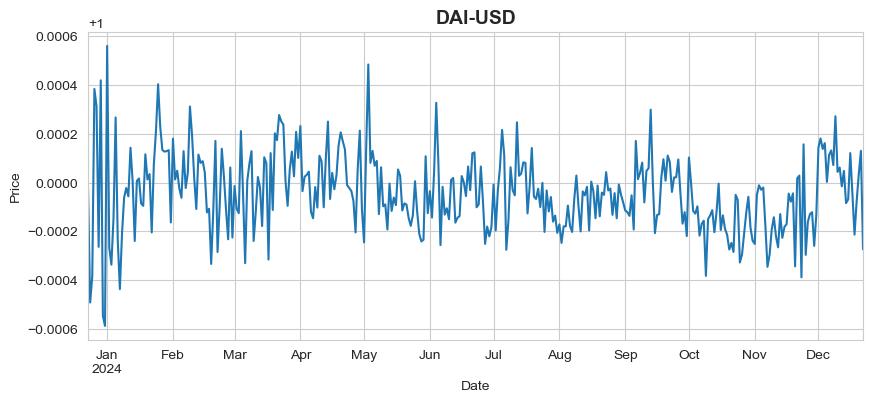

In [25]:
i=0
while i < len(coins):
    plt.figure()
    plt.subplots(figsize=(10, 4))
    crypto[coins[i]].plot()
    plt.ylabel('Price')
    plt.title(coins[i], fontsize=14, fontweight='bold')
    i += 1

<Figure size 640x480 with 0 Axes>

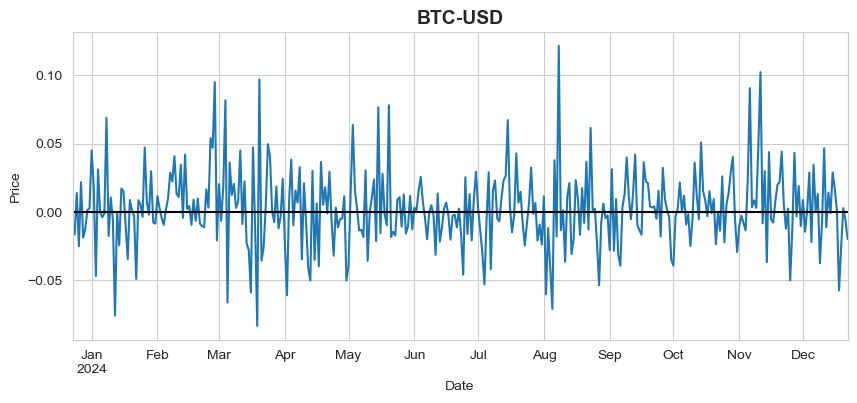

<Figure size 640x480 with 0 Axes>

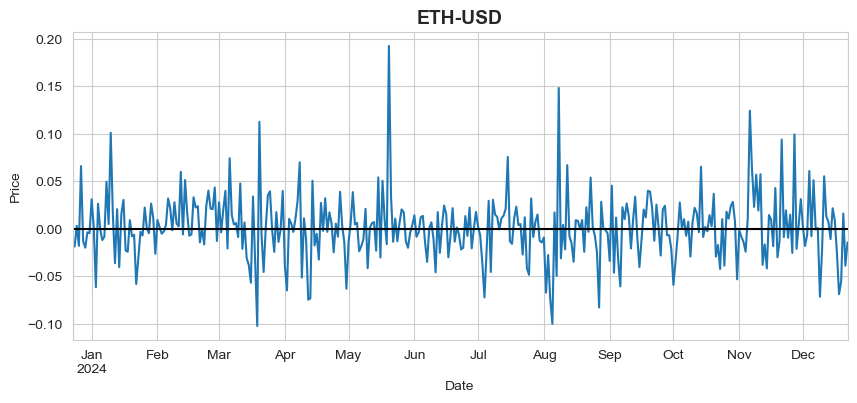

<Figure size 640x480 with 0 Axes>

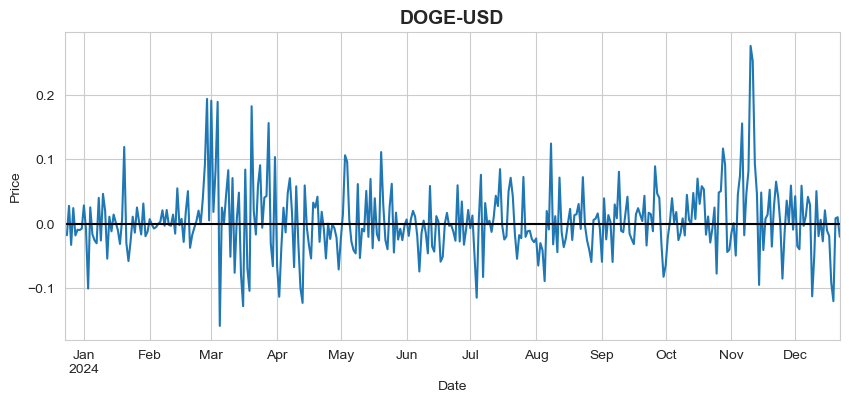

<Figure size 640x480 with 0 Axes>

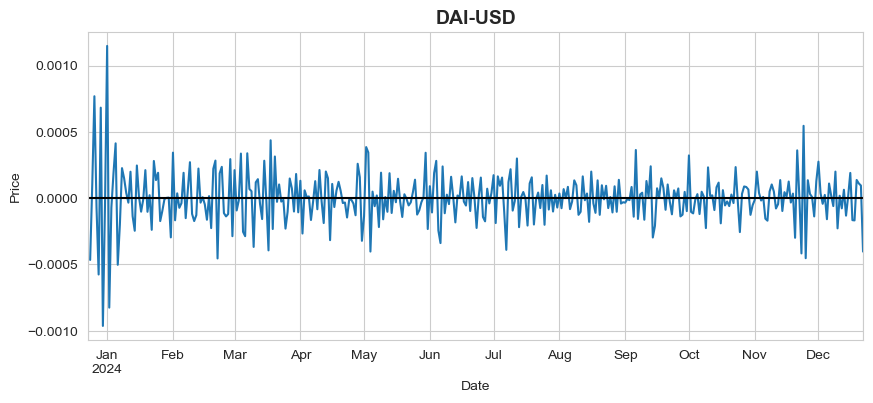

In [26]:
i=0
while i < len(coins):
    plt.figure()
    plt.subplots(figsize=(10, 4))
    rets[coins[i]].plot()
    plt.ylabel('Price')
    plt.title(coins[i], fontsize=14, fontweight='bold')
    plt.axhline(color='k')
    i += 1

In [27]:
Bitcoin = data['BTC-USD']

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 3., 0., 1., 2., 0., 3., 0., 0., 3., 1., 3., 2.,
        4., 0., 3., 1., 0., 1., 1., 0., 3., 3., 7., 1., 2., 6., 1., 3., 4.,
        2., 3., 1., 0., 3., 1., 1., 0., 0., 3., 0., 2., 0., 0., 1., 0., 2.,
        3., 0., 3., 0., 0., 0., 2., 0., 3., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([40407.59333625, 40464.9057446 , 40522.21815295, 40579.53056129,
        40636.84296964, 40694.15537799, 40751.46778634, 40808.78019468,
        40866.09260303, 40923.40501138, 40980.71741973, 41038.02982807,
        41095.34223642, 41152.65464477, 41209.96705312, 41267.27946147,
        41324.59186981, 41381.90427816, 41439.21668651, 41496.52909486,
        41553.8415032 , 41611.15391155, 41668.4663199 , 41725.77872825,
        41783.09113659, 41840.40354494, 41897.71595329, 41955.02836164,
        42012.34076998, 42069.65317833, 42126.

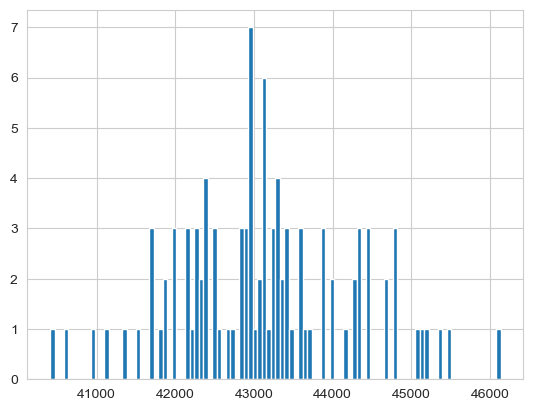

In [28]:
plt.hist(Bitcoin, bins=100)